# Exploratory Data Analysis

## 1. Import

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline

## 2. Load data

In [14]:
data = pd.read_parquet('../data/raw/raw.parquet')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   intent  434 non-null    object
 1   phrase  434 non-null    object
dtypes: object(2)
memory usage: 6.9+ KB


## 3. Explore data

### 3.1 Data overview

In [3]:
data.sample(20)

,intent,phrase
114,conhecer_contatos,Saber em qual cidade tem o banco
150,desbloquear_app,O que fazer para liberar aplicativo
420,quero_extrato_emprestimo,Quanto eu devo de empréstimo?
152,desbloquear_app,Preciso do desbloqueio do acesso ao App no cel...
55,alterar_dados_cadastrais,Quero fazer atualização cadastral
104,conhecer_contatos,o auto atendimento está funcionando?
28,acessar_conta,Como entrar na conta?
224,quero_quitar_emprestimo,Quero quitar o empréstimo
250,rastrear_cartao,Quando chegará o cartão?
381,quero_cartao,Tem como eu conseguir um cartão de crédito?


Some examples of phrases in the raw data. We have different types of phrases in different intents (classes) where each one represents a customer desire.

### 3.2 Intents Distribution

In [9]:
# count the number of phrases per intent
intents_count = data.intent.value_counts()

print('Number of different intents:', len(intents_count.index))
print('Number of phrases:', intents_count.sum())
print('Median number of phrases:', intents_count.median())

Number of different intents: 24
Number of phrases: 434
Median number of phrases: 16.5


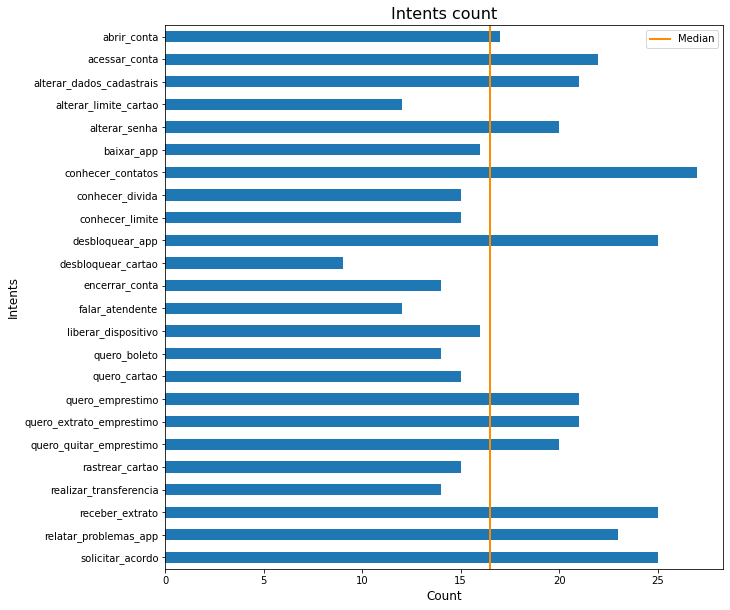

In [5]:
intents_count.sort_index(ascending = False).plot.barh(figsize = (10, 10))
plt.axvline(intents_count.median(), color = 'darkorange', linewidth = 2)
plt.title('Intents count', fontsize = 16)
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Intents', fontsize = 12)
plt.legend(['Median'])
plt.show()

How is possible to note the dataset has unbalanced intents with different numbers of examples. So is necessary to balance our dataset with some techniques. In this case, we will use the technique of oversampling and data augmentation to generate more examples.

### 3.3 Phrases Distribution

In [6]:
data.phrase.value_counts()

O que fazer para liberar aplicativo                         4
Estou tentando desbloquear meu aplicativo no meu celular    2
Aplicativo está bloqueado                                   2
Quero alterar o limite do meu cartão de crédito             2
Quero desbloquear meu aplicativo                            2
                                                           ..
Qual o limite que vai vir no cartão?                        1
Quero saber quanto posso gastar no cartão                   1
Saber quanto tenho de limite                                1
Quero saber qual é meu limite                               1
Saber desconto do empréstimo                                1
Name: phrase, Length: 423, dtype: int64

As we can see above, we have identical phrases with different intents. This is not a good situation because it can confuse our model. We will drop similar phrases.